# Sentiment Analysis

# This note for the cryptocurrency term from Dec 3 to Dec 5 to see the Impact of the drop that happened to the market in December 4 

In [1]:
# !pip3 install -qq twint
# !pip install -qq whatthelang

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

In [3]:
# Import Library
import twint
import nest_asyncio
nest_asyncio.apply()

import nest_asyncio
nest_asyncio.apply()

import sys, os
sys.path.append("twint/")

In [4]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [5]:
def get_tweets(search, limit=10000000):
    c = twint.Config()
    c.Search = search
    c.Limit = limit
    # c.Year = "2021"
    c.Lang = 'en'
    c.Since= "2021-12-03 00:00:00"
#     c.Until = "2021-12-03 00:00:00"
    c.Pandas = True
    c.Pandas_clean = True

    with HiddenPrints():
        print(twint.run.Search(c))
    return twint.output.panda.Tweets_df

In [23]:
# Run search
# twint.run.Search(b)

In [6]:
tweets_9 = pd.DataFrame()

In [7]:
tweets_9 = get_tweets("web3")

In [8]:
print('Total tweets_3: ', len(tweets_9.index))

Total tweets_3:  31076


In [10]:
tweets_9.to_csv(r'/Users/ibrahimaljadani/Downloads/web3_3.csv')

In [9]:
tweets_9

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1468156318464811015,1468156318464811015,1.638871e+12,2021-12-07 04:51:58,-0500,,Have you heard about #Web3 and what it can do?...,en,"[web3, bank, cryptocurrency, cryptonews, btc, ...",[],...,,,,,,[],,,,
1,1468156298025857025,1468156298025857025,1.638871e+12,2021-12-07 04:51:53,-0500,,How Web3 and DAOs Could Revolutionize the Way ...,en,[],[],...,,,,,,[],,,,
2,1468156245777555456,1468156245777555456,1.638871e+12,2021-12-07 04:51:40,-0500,,Managing your money on #blockchain technology ...,en,"[blockchain, web3, crypto]",[],...,,,,,,[],,,,
3,1468156216790630406,1468156216790630406,1.638871e+12,2021-12-07 04:51:33,-0500,,@Worldwide_WEB3 my game has been stuck for 2 ...,en,[],[],...,,,,,,[],,,,
4,1468156183995650049,1468156183995650049,1.638871e+12,2021-12-07 04:51:25,-0500,,【Web3.0銘柄】 #FIL (ファイルコイン) 分散化ストレージサービス、ファイルで使用...,ja,"[fil, btc]",[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31071,1466633794304184324,1466633794304184324,1.638508e+12,2021-12-03 00:01:59,-0500,,#xxxmodel #onlyfans #followme #onlyfansgirls #...,und,"[xxxmodel, onlyfans, followme, onlyfansgirls, ...",[],...,,,,,,[],,,,
31072,1466633684321140747,1466629983309344769,1.638508e+12,2021-12-03 00:01:33,-0500,,@Chars_Web3 Lmao ole sour patch kid acting ass 😭,en,[],[],...,,,,,,"[{'screen_name': 'Chars_Web3', 'name': 'Char B...",,,,
31073,1466633454854889474,1466433100179820562,1.638508e+12,2021-12-03 00:00:39,-0500,,@EylemCulculoglu Hocam #bpriva inceler misiniz...,tr,"[bpriva, web3]",[],...,,,,,,"[{'screen_name': 'EylemCulculoglu', 'name': 'E...",,,,
31074,1466633302979362816,1465712788001550342,1.638508e+12,2021-12-03 00:00:02,-0500,,@chriseberly @cdixon What is Web3’s direct rel...,en,[],[],...,,,,,,"[{'screen_name': 'chriseberly', 'name': 'Chris...",,,,


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1465889048497733634,1465889048497733634,1.638330e+12,2021-11-30 22:42:38,-0500,,@Santa_Coins #Santa_coin #BSC #Binancechain #B...,en,"[santa_coin, bsc, binancechain, btc, c_z, shib...",[],...,,,,,,[],,,,
1,1465889046081593352,1465889046081593352,1.638330e+12,2021-11-30 22:42:38,-0500,,🤝 Follow me on @betfury. Let's hunt for Bitcoi...,en,"[btc, betfurysuccess, bitcoin, staking]",[],...,,,,,,[],,,,
2,1465889041694420998,1465870411711737860,1.638330e+12,2021-11-30 22:42:37,-0500,,@bitcoin_evol 三周年前まではコンプ勢なのでモンマンタイ☺️ 新恒常スタイルはね...,ja,[],[],...,,,,,,"[{'screen_name': 'bitcoin_evol', 'name': 'くまイー...",,,,
3,1465889038087307268,1465885869298970631,1.638330e+12,2021-11-30 22:42:36,-0500,,@latimes I know we all probably must have hear...,en,[],[],...,,,,,,"[{'screen_name': 'latimes', 'name': 'Los Angel...",,,,
4,1465889035658960897,1463702879789854723,1.638330e+12,2021-11-30 22:42:35,-0500,,@RTNBA This wasn't my first time trading but h...,en,[],[],...,,,,,,"[{'screen_name': 'RTNBA', 'name': 'NBA Retweet...",,,,


In [4]:
cryptocurrency_4 = pd.read_csv("/Users/ibrahimaljadani/Downloads/cryptocurrency_4.csv",
                 lineterminator='\n')
cryptocurrency_3 = pd.read_csv("/Users/ibrahimaljadani/Downloads/cryptocurrency_3.csv",
                 lineterminator='\n')
cryptocurrency_2 = pd.read_csv("/Users/ibrahimaljadani/Downloads/cryptocurrency_2.csv",
                 lineterminator='\n')
cryptocurrency = pd.read_csv("/Users/ibrahimaljadani/Downloads/cryptocurrency.csv",
                 lineterminator='\n')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
cryptocurrency


,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1466335917958914048,1466335917958914048,1.638437e+12,2021-12-02 04:18:20,-500,NaN,Cryptocurrency. The so-called Omicron is on t...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1466335908722970630,1460460439788163075,1.638437e+12,2021-12-02 04:18:18,-500,NaN,@virgodex This project looks very interesting....,en,"['vdf', 'cryptocurrency', 'binancesmartchain']",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'virgodex', 'name': 'VirgodEx...",NaN,NaN,NaN,NaN
2,2,1466335907590459399,1465976558800224262,1.638437e+12,2021-12-02 04:18:18,-500,NaN,"@CryptoTownEU It’s an awesome airdroff, like w...",en,"['airdrop', 'crypto', 'airdrops', 'cryptocurre...",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CryptoTownEU', 'name': 'Cryp...",NaN,NaN,NaN,NaN
3,3,1466335904457445379,1466335904457445379,1.638437e+12,2021-12-02 04:18:17,-500,NaN,Don't miss the metaverse project on the Solana...,en,"['solana', 'ico', 'metaverse', 'airdrops', 'cr...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1466335891690033155,1466335891690033155,1.638437e+12,2021-12-02 04:18:14,-500,NaN,DEXGame oyun ve oyunculara yeni bir dünya kapı...,tr,"['metaverse', 'game', 'play2earn', 'dexgame', ...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91506,91506,1465332587207925764,1465309845012287490,1.638197e+12,2021-11-29 09:51:28,-500,NaN,@cz_binance @elonmusk @binance i choice $50.00...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'cz_binance', 'name': 'CZ 🔶 B...",NaN,NaN,NaN,NaN
91507,91507,1465332578454589443,1465320018875498497,1.638197e+12,2021-11-29 09:51:25,-500,NaN,@valleyTheCat @NFTLuffy CYBER MONDAY SPECIAL! ...,en,"['sol', 'cybermonday', 'nfts', 'digitalassets'...",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'valleyTheCat', 'name': 'vall...",NaN,NaN,NaN,NaN
91508,91508,1465332551216631810,1465275468878209026,1.638197e+12,2021-11-29 09:51:19,-500,NaN,@HipposCoin @HippoFamilyNFT 1This project is v...,en,"['airdrop_round_2', 'airdrops', 'solana']",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'HipposCoin', 'name': 'Hippos...",NaN,NaN,NaN,NaN
91509,91509,1465332550663122949,1465332550663122949,1.638197e+12,2021-11-29 09:51:19,-500,NaN,New Series Game Characters will be added every...,en,"['nfts', 'nft', 'nftart', 'nftartist', 'nftcol...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
# cryptocurrency_2
cryptocurrency_2 = cryptocurrency_2.drop(columns=['id', 'conversation_id', 'created_at','cashtags', 'user_id', 'timezone',
       'place',
       'user_id_str',  'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet',  'nreplies',
       'nretweets', 'quote_url', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'])

In [10]:
# cryptocurrency_3
cryptocurrency_3 = cryptocurrency_3.drop(columns=['id', 'conversation_id', 'created_at','cashtags', 'user_id', 'timezone',
       'place',
       'user_id_str',  'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet',  'nreplies',
       'nretweets', 'quote_url', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'])

In [11]:
# cryptocurrency_4
cryptocurrency_4 = cryptocurrency_4.drop(columns=['id', 'conversation_id', 'created_at','cashtags', 'user_id', 'timezone',
       'place',
       'user_id_str',  'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet',  'nreplies',
       'nretweets', 'quote_url', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'])

In [12]:
cryptocurrency_2 = cryptocurrency_2[['date', 'username', 'tweet', 'hashtags', 'nlikes','language', 'search']]
cryptocurrency_3 = cryptocurrency_3[['date', 'username', 'tweet', 'hashtags', 'nlikes','language', 'search']]
cryptocurrency_4 = cryptocurrency_4[['date', 'username', 'tweet', 'hashtags', 'nlikes','language', 'search']]

In [13]:
cryptocurrency_2.reset_index(drop=True, inplace=True)
cryptocurrency_3.reset_index(drop=True, inplace=True)
cryptocurrency_4.reset_index(drop=True, inplace=True)


In [14]:
pd.concat([cryptocurrency_2, cryptocurrency_3, cryptocurrency_4]).to_csv(
    r'/Users/ibrahimaljadani/Desktop/Fall 2021/Data Mining/WEB3/cryptocurrency_tweets.csv')

In [15]:
cryptocurrency_tweets = pd.read_csv("/Users/ibrahimaljadani/Desktop/Fall 2021/Data Mining/WEB3/cryptocurrency_tweets.csv",
                 lineterminator='\n')

In [16]:
cryptocurrency_tweets.head(3)

,Unnamed: 0,date,username,tweet,hashtags,nlikes,language,search
0,0,2021-12-04 18:59:58,R1988Sajad_,@keplerswap 🔥👌🚀😎 @K2Block13 @MinKhantKyaw780 ...,"['cryptocurrency', 'airdrop', 'bsc', 'bitcoin'...",1,und,cryptocurrency
1,1,2021-12-04 18:59:58,Dredsole,When you can not send crypto because you do no...,"['cryptocurrency', 'defi']",0,en,cryptocurrency
2,2,2021-12-04 18:59:57,ExchangeWhales,"🚀🚀🚀 $1,024,100 BTCUSD LONGED @$49,234.0 💻 on #...","['binance', 'btc', 'cryptocurrency']",0,en,cryptocurrency


In [17]:
cryptocurrency_tweets['date'] = pd.to_datetime(cryptocurrency_tweets['date'])
cryptocurrency_tweets['time'],cryptocurrency_tweets['date']= cryptocurrency_tweets['date'].apply(
    lambda x:x.time()),cryptocurrency_tweets['date'].apply(lambda x:x.date())

In [18]:
cryptocurrency_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135037 entries, 0 to 135036
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  135037 non-null  int64 
 1   date        135037 non-null  object
 2   username    135037 non-null  object
 3   tweet       135037 non-null  object
 4   hashtags    135037 non-null  object
 5   nlikes      135037 non-null  int64 
 6   language    135037 non-null  object
 7   search      135037 non-null  object
 8   time        135037 non-null  object
dtypes: int64(2), object(7)
memory usage: 9.3+ MB


In [19]:
cryptocurrency_tweets = cryptocurrency_tweets.drop(columns=['Unnamed: 0'])

In [20]:
cryptocurrency_tweets.reset_index(drop=True, inplace=True)

In [22]:
cryptocurrency_tweets.duplicated().sum()

63318

In [23]:
cryptocurrency_tweets = cryptocurrency_tweets.drop_duplicates()

In [24]:
cryptocurrency_tweets.duplicated().sum()

0

In [25]:
cryptocurrency_tweets.date.unique()

array([datetime.date(2021, 12, 4), datetime.date(2021, 12, 3),
       datetime.date(2021, 12, 5)], dtype=object)

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

text = cryptocurrency_tweets.tweet.values

# adding movie script specific stopwords
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color = 'white',
   
    stopwords = stopwords).generate(str(text))

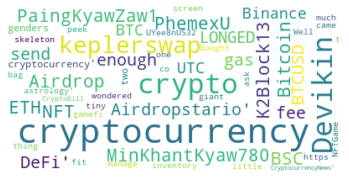

In [29]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [8, 8]

In [30]:
def clean_text_fun(tweet):
    tweet = tweet.lower() # text lowercase
    tweet = re.sub('@[^\s]+', '', tweet) # remove usernames
    tweet = re.sub('\[.*?\]', '', tweet) # remove square brackets
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) # remove URLs
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # remove punctuation
    tweet = re.sub('\w*\d\w*', '', tweet) 
    tweet = re.sub('[‘’“”…]', '', tweet)
    tweet = re.sub('\n', '', tweet)
    return tweet

    
tweet = lambda x: clean_text_fun(x)

In [31]:
clean_tweet = pd.DataFrame(cryptocurrency_tweets.tweet.apply(tweet))

clean_tweet

,tweet
0,🔥👌🚀😎 cryptocurrency airdrop bsc bitc...
1,when you can not send crypto because you do no...
2,🚀🚀🚀 btcusd longed 💻 on binance utc btc cryp...
3,🔻🔻🔻 btcusd shorted 💻 on binance utc btc cry...
4,watching the cryptocurrency markets right now ...
...,...
134769,💰💰💰 giveaway 💰💰💰 prize klv like this tweet...
134772,whos laughing now btc king of crypto ust luna ...
134773,the two genders are cryptocurrency and astrology
134878,ever wondered how devikin manage to fit so muc...


In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

text_2 = clean_tweet.tweet.values

# adding movie script specific stopwords
stopwords = set(STOPWORDS)

wordcloud_2 = WordCloud(
    background_color = 'white',
   
    stopwords = stopwords).generate(str(text_2))

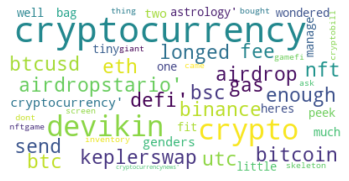

In [33]:
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [8, 8]

In [34]:
def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
clean_tweet['tweet']= clean_tweet['tweet'].apply (lambda x: tokenize(x.lower()))

In [27]:
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ibrahimaljadani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ibrahimaljadani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ibrahimaljadani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stopwords]
    return text_nostopword

clean_tweet['tweet']= clean_tweet['tweet'].apply(lambda x: remove_stopword(x))

In [36]:
clean_tweet

,tweet
0,"[, cryptocurrency, airdrop, bsc, bitcoin, eth,..."
1,"[send, crypto, enough, gas, fee, cryptocurrenc..."
2,"[, btcusd, longed, binance, utc, btc, cryptocu..."
3,"[, btcusd, shorted, binance, utc, btc, cryptoc..."
4,"[watching, cryptocurrency, markets, right, now, ]"
...,...
134769,"[, giveaway, prize, klv, tweet, retweet, tweet..."
134772,"[whos, laughing, now, btc, king, crypto, ust, ..."
134773,"[two, genders, cryptocurrency, astrology]"
134878,"[wondered, devikin, manage, fit, much, one, ti..."


In [37]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
def lemmatize(s):
  s = [wnl.lemmatize(word) for word in s]
  return s
clean_tweet = clean_tweet.assign(lemmatize = clean_tweet.tweet.apply(lambda x: lemmatize(x)))

In [38]:
# Porter Stemmer
ps= nltk.PorterStemmer()


# stemming 

def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

clean_tweet["stemmer"]= clean_tweet["tweet"].apply(lambda x: stem(x))

In [39]:
clean_tweet['stemmer'] = clean_tweet['stemmer'].apply(lambda x: ' '.join([w for w in x]))
clean_tweet.head()

,tweet,lemmatize,stemmer
0,"[, cryptocurrency, airdrop, bsc, bitcoin, eth,...","[, cryptocurrency, airdrop, bsc, bitcoin, eth,...",cryptocurr airdrop bsc bitcoin eth keplerswap...
1,"[send, crypto, enough, gas, fee, cryptocurrenc...","[send, crypto, enough, gas, fee, cryptocurrenc...",send crypto enough ga fee cryptocurr defi
2,"[, btcusd, longed, binance, utc, btc, cryptocu...","[, btcusd, longed, binance, utc, btc, cryptocu...",btcusd long binanc utc btc cryptocurr
3,"[, btcusd, shorted, binance, utc, btc, cryptoc...","[, btcusd, shorted, binance, utc, btc, cryptoc...",btcusd short binanc utc btc cryptocurr
4,"[watching, cryptocurrency, markets, right, now, ]","[watching, cryptocurrency, market, right, now, ]",watch cryptocurr market right now


In [40]:
data_list = clean_tweet.loc[:,"tweet"].to_list()
len(data_list)

71719

In [41]:
flat_data_list = [item for sublist in data_list for item in sublist]
len(flat_data_list)

1109403

In [42]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()
data_count

cryptocurrency    70937
                  63475
project           38263
crypto            24270
will              22965
                  ...  
wolftrade             1
khabylame             1
chronicles            1
一枝独秀                  1
बनव                   1
Name: 0, Length: 50070, dtype: int64

In [43]:
from nltk.probability import FreqDist
freq_count= FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count

FreqDist({1: 27308, 2: 6975, 3: 3226, 4: 1944, 5: 1286, 6: 967, 7: 738, 8: 623, 9: 498, 10: 428, ...})

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


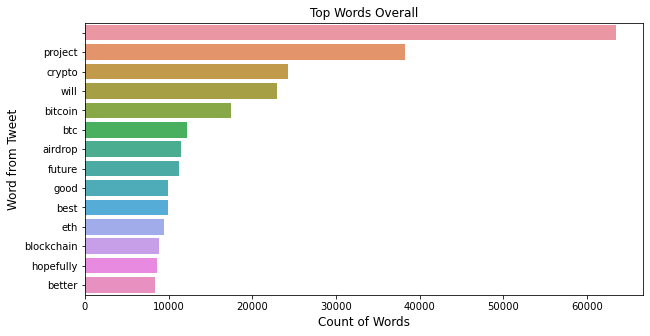

In [52]:
data_count = data_count[:15,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [46]:
# Time_Of_tweet = pd.DataFrame()

Time_Of_tweet = cryptocurrency_tweets.time.apply(lambda x: x.hour)

<AxesSubplot:>

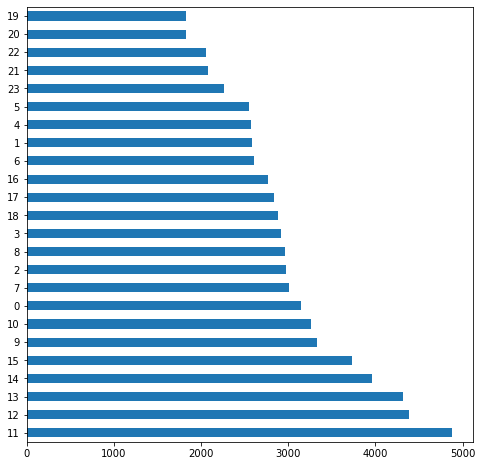

In [47]:
Time_Of_tweet.value_counts().plot(kind='barh')

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



In [49]:
def sentiment_analyze(stemmer):
  score = SentimentIntensityAnalyzer().polarity_scores(stemmer)
  neg = score['neg'] 
  pos = score['pos']
  neu = score['neu']

  return SentimentIntensityAnalyzer().polarity_scores(stemmer)

In [50]:
clean_tweet['label_1']  = clean_tweet['stemmer'].apply(sentiment_analyze)
clean_tweet['compound'] = clean_tweet['label_1'].apply(lambda d:d['compound'])
clean_tweet['label_2']  = clean_tweet['compound'].apply(lambda score: 'positive' if score>=0.05 else 'negative' if score<=-0.05 else 'neutral')
clean_tweet

,tweet,lemmatize,stemmer,label_1,compound,label_2
0,"[, cryptocurrency, airdrop, bsc, bitcoin, eth,...","[, cryptocurrency, airdrop, bsc, bitcoin, eth,...",cryptocurr airdrop bsc bitcoin eth keplerswap...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,"[send, crypto, enough, gas, fee, cryptocurrenc...","[send, crypto, enough, gas, fee, cryptocurrenc...",send crypto enough ga fee cryptocurr defi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,"[, btcusd, longed, binance, utc, btc, cryptocu...","[, btcusd, longed, binance, utc, btc, cryptocu...",btcusd long binanc utc btc cryptocurr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,"[, btcusd, shorted, binance, utc, btc, cryptoc...","[, btcusd, shorted, binance, utc, btc, cryptoc...",btcusd short binanc utc btc cryptocurr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,"[watching, cryptocurrency, markets, right, now, ]","[watching, cryptocurrency, market, right, now, ]",watch cryptocurr market right now,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
...,...,...,...,...,...,...
134769,"[, giveaway, prize, klv, tweet, retweet, tweet...","[, giveaway, prize, klv, tweet, retweet, tweet...",giveaway prize klv tweet retweet tweet follow...,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106,positive
134772,"[whos, laughing, now, btc, king, crypto, ust, ...","[who, laughing, now, btc, king, crypto, ust, l...",who laugh now btc king crypto ust luna bleed h...,"{'neg': 0.045, 'neu': 0.573, 'pos': 0.382, 'co...",0.8910,positive
134773,"[two, genders, cryptocurrency, astrology]","[two, gender, cryptocurrency, astrology]",two gender cryptocurr astrolog,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
134878,"[wondered, devikin, manage, fit, much, one, ti...","[wondered, devikin, manage, fit, much, one, ti...",wonder devikin manag fit much one tini bag wel...,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.5574,positive


In [53]:
clean_tweet['search'] = cryptocurrency_tweets['search']
clean_tweet['date'] = cryptocurrency_tweets['date']
clean_tweet['time'] = cryptocurrency_tweets['time']
clean_tweet

,tweet,lemmatize,stemmer,label_1,compound,label_2,search,date,time
0,"[, cryptocurrency, airdrop, bsc, bitcoin, eth,...","[, cryptocurrency, airdrop, bsc, bitcoin, eth,...",cryptocurr airdrop bsc bitcoin eth keplerswap...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,cryptocurrency,2021-12-04,18:59:58
1,"[send, crypto, enough, gas, fee, cryptocurrenc...","[send, crypto, enough, gas, fee, cryptocurrenc...",send crypto enough ga fee cryptocurr defi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,cryptocurrency,2021-12-04,18:59:58
2,"[, btcusd, longed, binance, utc, btc, cryptocu...","[, btcusd, longed, binance, utc, btc, cryptocu...",btcusd long binanc utc btc cryptocurr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,cryptocurrency,2021-12-04,18:59:57
3,"[, btcusd, shorted, binance, utc, btc, cryptoc...","[, btcusd, shorted, binance, utc, btc, cryptoc...",btcusd short binanc utc btc cryptocurr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,cryptocurrency,2021-12-04,18:59:51
4,"[watching, cryptocurrency, markets, right, now, ]","[watching, cryptocurrency, market, right, now, ]",watch cryptocurr market right now,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,cryptocurrency,2021-12-04,18:59:50
...,...,...,...,...,...,...,...,...,...
134769,"[, giveaway, prize, klv, tweet, retweet, tweet...","[, giveaway, prize, klv, tweet, retweet, tweet...",giveaway prize klv tweet retweet tweet follow...,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106,positive,cryptocurrency,2021-12-03,19:13:46
134772,"[whos, laughing, now, btc, king, crypto, ust, ...","[who, laughing, now, btc, king, crypto, ust, l...",who laugh now btc king crypto ust luna bleed h...,"{'neg': 0.045, 'neu': 0.573, 'pos': 0.382, 'co...",0.8910,positive,cryptocurrency,2021-12-03,19:13:39
134773,"[two, genders, cryptocurrency, astrology]","[two, gender, cryptocurrency, astrology]",two gender cryptocurr astrolog,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,cryptocurrency,2021-12-03,19:13:39
134878,"[wondered, devikin, manage, fit, much, one, ti...","[wondered, devikin, manage, fit, much, one, ti...",wonder devikin manag fit much one tini bag wel...,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.5574,positive,cryptocurrency,2021-12-03,19:05:28


In [54]:
clean_tweet.groupby('label_2').count()



,tweet,lemmatize,stemmer,label_1,compound,search,date,time
label_2,,,,,,,,
negative,6280,6280,6280,6280,6280,6280,6280,6280
neutral,30360,30360,30360,30360,30360,30360,30360,30360
positive,35079,35079,35079,35079,35079,35079,35079,35079


<AxesSubplot:>

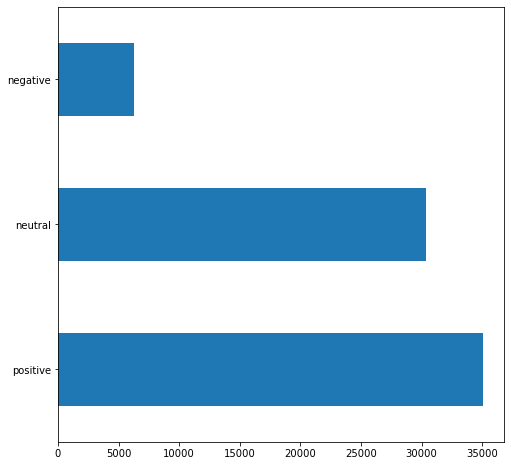

In [55]:
clean_tweet['label_2'].value_counts().plot(kind='barh')



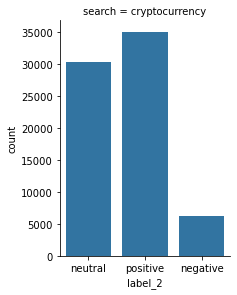

In [57]:
sns.catplot(x="label_2", hue="search", col="search",
                data=clean_tweet, kind="count" , height=4, aspect=.8);